# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Make partial correlation plots for each of the numeric variables in your model. Do you notice any significant non-linearities?
6. Include transformations and interactions of your variables, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
7. Summarize your results from 1 to 6. Have you learned anything about overfitting and underfitting, or model selection?
8. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.

In [147]:
! git clone https://github.com//ds4e/linearModels

fatal: destination path 'linearModels' already exists and is not an empty directory.


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('/content/linearModels/lab/data/airbnb_hw.csv')
df.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [150]:
print(df.describe())
print(df.info())

            Host Id  Review Scores Rating (bin)       Zipcode          Beds  \
count  3.047800e+04                22155.000000  30344.000000  30393.000000   
mean   1.273171e+07                   90.738659  10584.854831      1.530089   
std    1.190270e+07                    9.059519    921.299397      1.015359   
min    5.000000e+02                   20.000000   1003.000000      0.000000   
25%    2.701298e+06                   85.000000  10017.000000      1.000000   
50%    8.551693e+06                   90.000000  10065.000000      1.000000   
75%    2.120617e+07                  100.000000  11216.000000      2.000000   
max    4.303307e+07                  100.000000  99135.000000     16.000000   

       Number of Records  Number Of Reviews  Review Scores Rating  
count            30478.0       30478.000000          22155.000000  
mean                 1.0          12.018735             91.993230  
std                  0.0          21.980703              8.850373  
min             

In [151]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Host Since'] = pd.to_numeric(df['Host Since'], errors='coerce')
df['Zipcode'] = df['Zipcode'].astype('object')

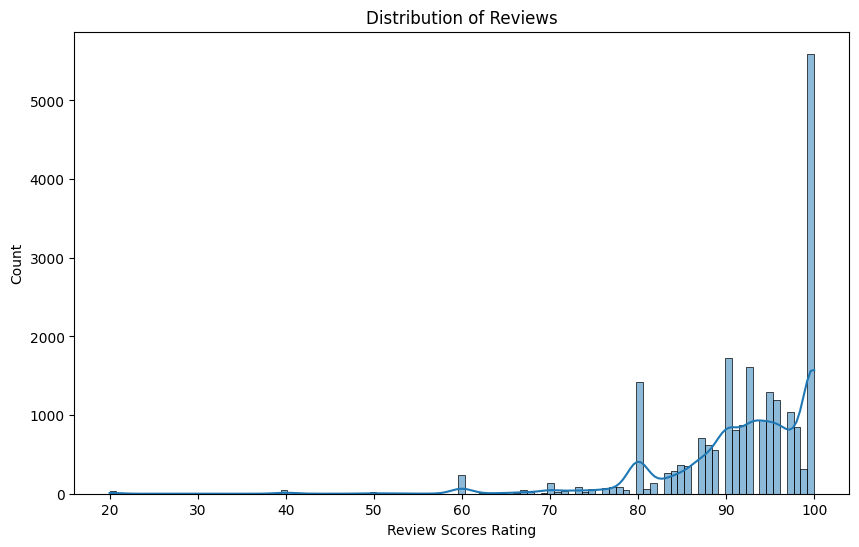

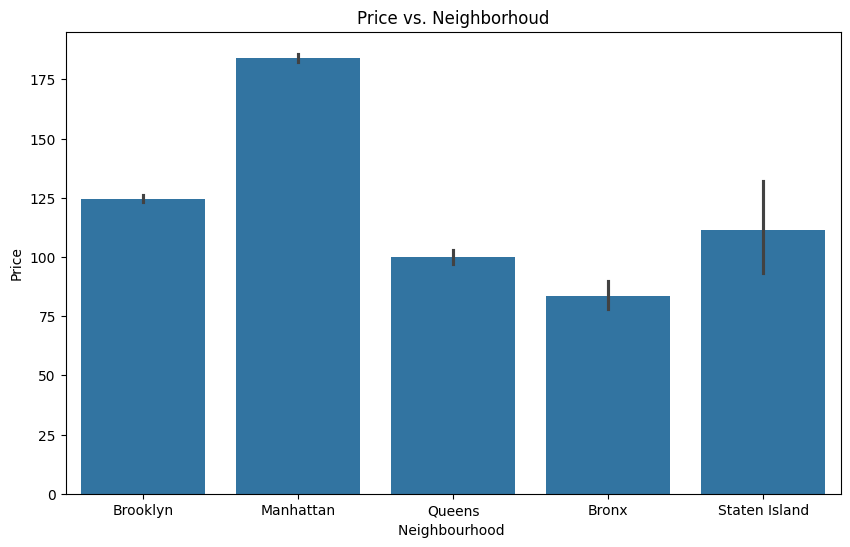

In [152]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Review Scores Rating'], kde=True)
plt.title('Distribution of Reviews')
plt.show()


plt.figure(figsize=(10,6))
sns.barplot(x='Neighbourhood ', y="Price", data=df)
plt.title('Price vs. Neighborhoud')
plt.show()


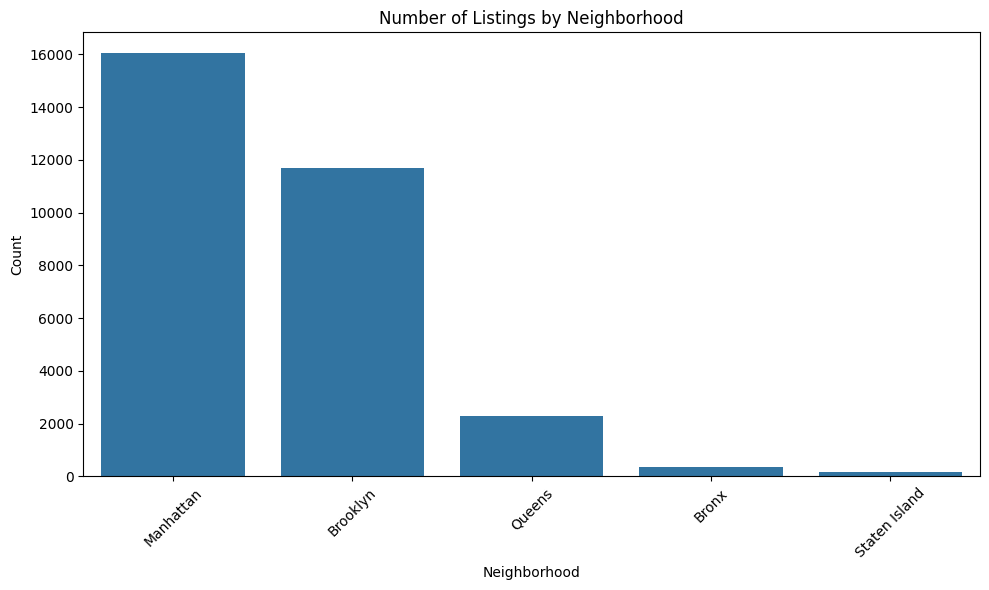

In [153]:
zipcode_counts = df['Neighbourhood '].value_counts().reset_index()
zipcode_counts.columns = ['Neighbourhood', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Neighbourhood', y='Count', data=zipcode_counts)
plt.title('Number of Listings by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [154]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30478 entries, 0 to 30477
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Host Id                     30478 non-null  int64  
 1   Host Since                  0 non-null      float64
 2   Name                        30478 non-null  object 
 3   Neighbourhood               30478 non-null  object 
 4   Property Type               30475 non-null  object 
 5   Review Scores Rating (bin)  22155 non-null  float64
 6   Room Type                   30478 non-null  object 
 7   Zipcode                     30344 non-null  object 
 8   Beds                        30393 non-null  float64
 9   Number of Records           30478 non-null  int64  
 10  Number Of Reviews           30478 non-null  int64  
 11  Price                       30297 non-null  float64
 12  Review Scores Rating        22155 non-null  float64
dtypes: float64(5), int64(3), object

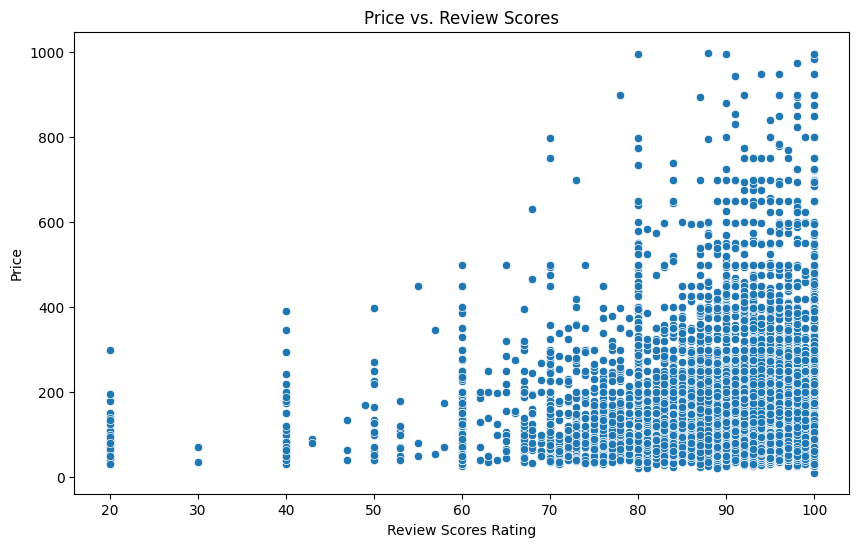

In [155]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Review Scores Rating', y="Price", data=df)
plt.title('Price vs. Review Scores')
plt.show()

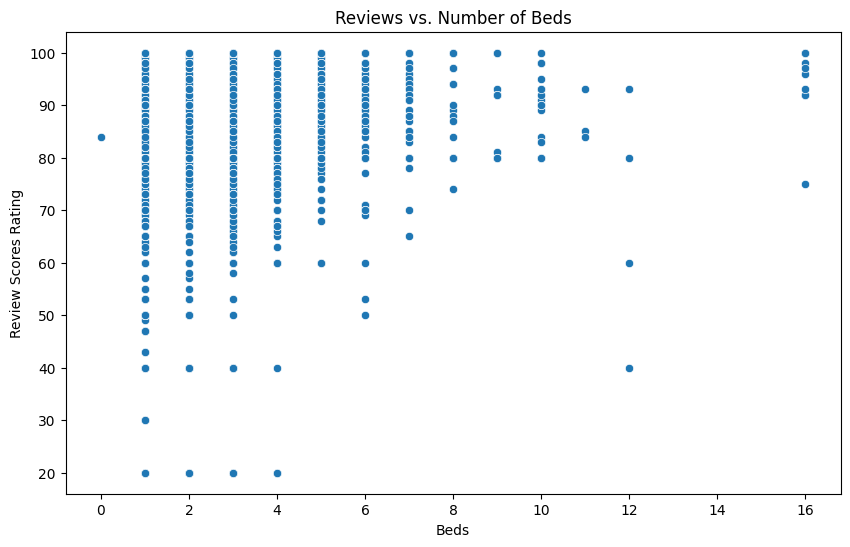

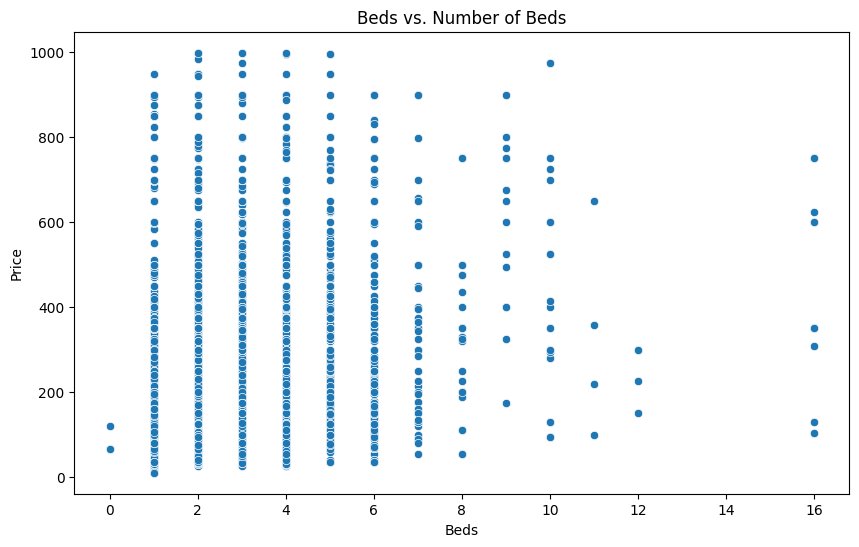

In [156]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Beds', y="Review Scores Rating", data=df)
plt.title('Reviews vs. Number of Beds')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='Beds', y="Price", data=df)
plt.title('Beds vs. Number of Beds')
plt.show()

Text(0.5, 1.0, 'Distribution of Prices')

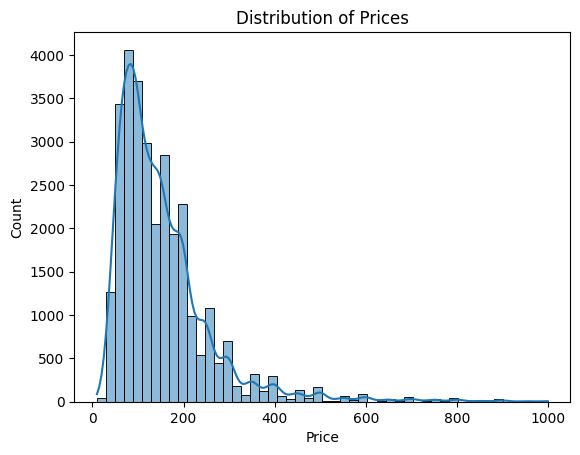

In [157]:
sns.histplot(df['Price'], bins=50, kde=True)
plt.title('Distribution of Prices')

Text(0.5, 1.0, 'Room Type Distribution')

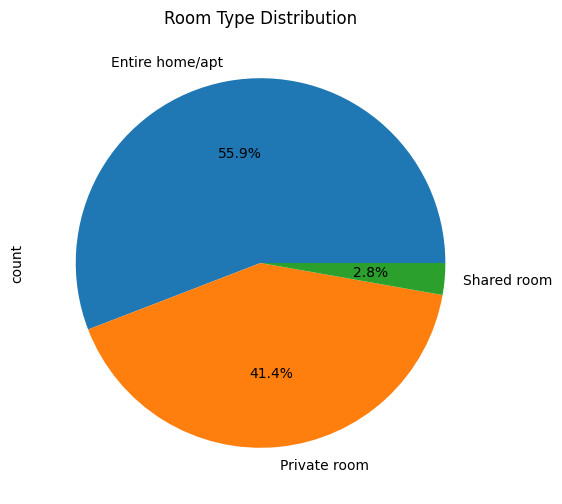

In [158]:
room_counts = df['Room Type'].value_counts()
room_counts.plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Room Type Distribution')

In [159]:
df = pd.get_dummies(df, columns=['Neighbourhood ', 'Property Type', 'Room Type', 'Zipcode'], drop_first=True)
df = df.drop(['Host Since', 'Name', 'Host Id'], axis=1)

In [160]:
df['Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].mean())
df['Review Scores Rating (bin)'] = df['Review Scores Rating (bin)'].fillna(df['Review Scores Rating (bin)'].mean())
df['Beds'] = df['Beds'].fillna(df['Beds'].median())
df['Number of Records'] = df['Number of Records'].fillna(df['Number of Records'].median())
df['Number Of Reviews'] = df['Number Of Reviews'].fillna(df['Number Of Reviews'].median())
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [161]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['Beds', 'Number of Records', 'Number Of Reviews', 'Review Scores Rating']
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [162]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop('Price', axis=1)
y = df['Price']

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [163]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# Ensure y is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Select only numeric columns from X
X_train_num = X_train.select_dtypes(include=[np.number])

In [164]:
# Model 1: Only 'Number Of Reviews'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

model1 = LinearRegression()
model1.fit(X_train[['Number Of Reviews']], y_train)

# Predictions
y_train_pred1 = model1.predict(X_train[['Number Of Reviews']])
y_test_pred1 = model1.predict(X_test[['Number Of Reviews']])

# Evaluation
rmse_train1 = np.sqrt(mean_squared_error(y_train, y_train_pred1))
rmse_test1 = np.sqrt(mean_squared_error(y_test, y_test_pred1))
r2_train1 = r2_score(y_train, y_train_pred1)
r2_test1 = r2_score(y_test, y_test_pred1)


In [165]:
# Model 2: Only 'Beds'
model2 = LinearRegression()
model2.fit(X_train[['Beds']], y_train)

y_train_pred2 = model2.predict(X_train[['Beds']])
y_test_pred2 = model2.predict(X_test[['Beds']])

rmse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
rmse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
r2_train2 = r2_score(y_train, y_train_pred2)
r2_test2 = r2_score(y_test, y_test_pred2)


In [166]:
# Model 3: All features
model3 = LinearRegression()
model3.fit(X_train, y_train)

y_train_pred3 = model3.predict(X_train)
y_test_pred3 = model3.predict(X_test)

rmse_train3 = np.sqrt(mean_squared_error(y_train, y_train_pred3))
rmse_test3 = np.sqrt(mean_squared_error(y_test, y_test_pred3))
r2_train3 = r2_score(y_train, y_train_pred3)
r2_test3 = r2_score(y_test, y_test_pred3)


In [167]:
# EVALUATE MODELS

print("Model 1: 'Number Of Reviews'")
print(f"Train RMSE: {rmse_train1:.2f}, Test RMSE: {rmse_test1:.2f}")
print(f"Train R²: {r2_train1:.3f}, Test R²: {r2_test1:.3f}\n")

print("Model 2: 'Beds'")
print(f"Train RMSE: {rmse_train2:.2f}, Test RMSE: {rmse_test2:.2f}")
print(f"Train R²: {r2_train2:.3f}, Test R²: {r2_test2:.3f}\n")

print("Model 3: All Features")
print(f"Train RMSE: {rmse_train3:.2f}, Test RMSE: {rmse_test3:.2f}")
print(f"Train R²: {r2_train3:.3f}, Test R²: {r2_test3:.3f}")

# the last, more robust model does the best because it has the highest R-squared value -->
# similar for training and test data, indicating that it is not over- or under-fit
# price is determined by many features - the first models only use one variable to explain price

Model 1: 'Number Of Reviews'
Train RMSE: 107.89, Test RMSE: 110.96
Train R²: 0.001, Test R²: 0.001

Model 2: 'Beds'
Train RMSE: 98.45, Test RMSE: 102.08
Train R²: 0.168, Test R²: 0.154

Model 3: All Features
Train RMSE: 77.65, Test RMSE: 83.25
Train R²: 0.483, Test R²: 0.438


In [172]:
# Add constant
X_train_sm = sm.add_constant(X_train_num)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()


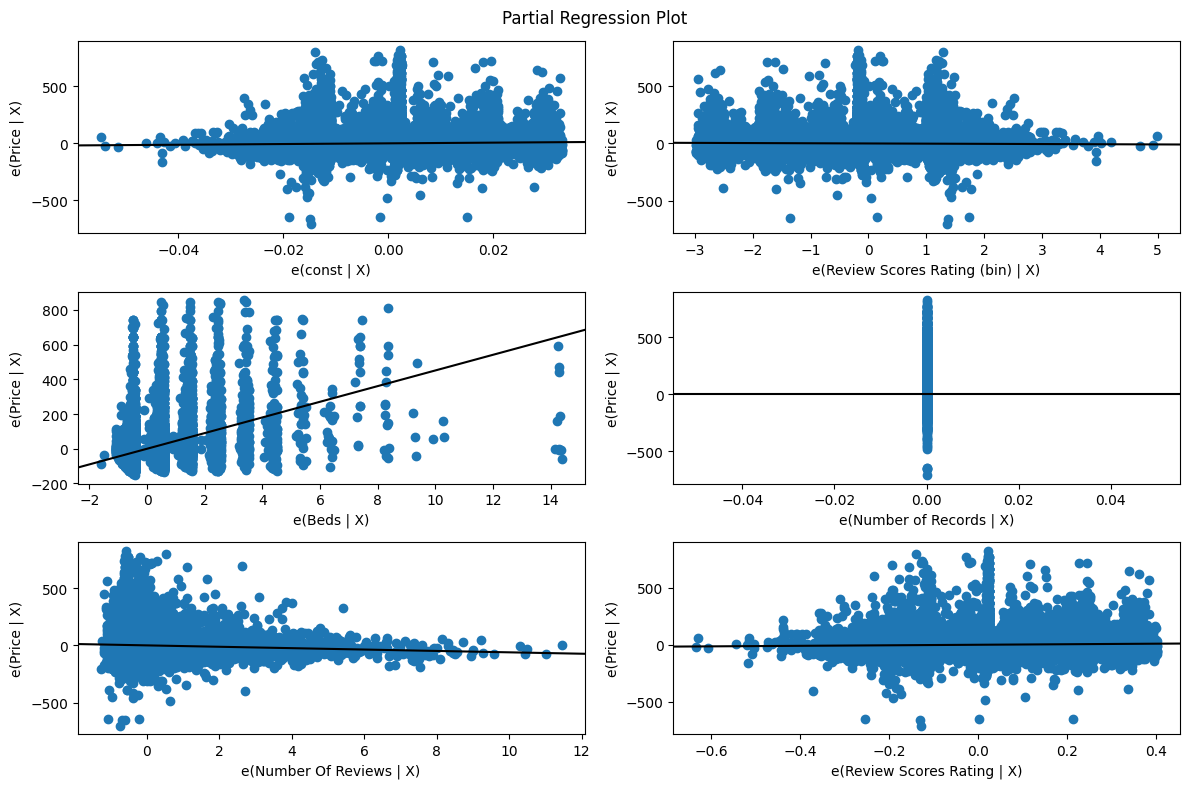

In [173]:
# Partial regression plots
fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_sm, fig=fig)
plt.tight_layout()
plt.show()


In [187]:
# transform model
# Log Transformation (only for positive values)
df['Log_Price'] = np.log(df['Price'] + 1)  # Adding 1 to avoid log(0) error
df['Log_Number_Reviews'] = np.log(df['Number Of Reviews'] + 1)

In [188]:
# interaction terms
df['Beds_Reviews_Interaction'] = df['Beds'] * df['Number Of Reviews']

In [189]:
# polynomial
df['Beds_Squared'] = df['Beds'] ** 2
df['Number_Reviews_Squared'] = df['Number Of Reviews'] ** 2

In [194]:
# Add the transformed and interaction terms to X
X_complex = df[['Beds', 'Number Of Reviews', 'Log_Price',
                'Beds_Reviews_Interaction', 'Beds_Squared', 'Number_Reviews_Squared']]

y_complex = df['Price']


In [195]:
# 80/20 split
X_train_complex, X_test_complex, y_train_complex, y_test_complex = train_test_split(
    X_complex, y_complex, test_size=0.2, random_state=42
)


In [196]:
# Fit the linear model
model_complex = LinearRegression()
model_complex.fit(X_train_complex, y_train_complex)

# Predictions
y_train_pred_complex = model_complex.predict(X_train_complex)
y_test_pred_complex = model_complex.predict(X_test_complex)

# Evaluation: RMSE and R²
rmse_train_complex = np.sqrt(mean_squared_error(y_train_complex, y_train_pred_complex))
rmse_test_complex = np.sqrt(mean_squared_error(y_test_complex, y_test_pred_complex))
r2_train_complex = r2_score(y_train_complex, y_train_pred_complex)
r2_test_complex = r2_score(y_test_complex, y_test_pred_complex)


In [197]:
# compare to previous 3 models
print("Complex Model: All Features + Transformations + Interactions")
print(f"Train RMSE: {rmse_train_complex:.2f}, Test RMSE: {rmse_test_complex:.2f}")
print(f"Train R²: {r2_train_complex:.3f}, Test R²: {r2_test_complex:.3f}\n")

# Compare with simpler models (from earlier code)
print("Model 1: 'Number Of Reviews'")
print(f"Train RMSE: {rmse_train1:.2f}, Test RMSE: {rmse_test1:.2f}")
print(f"Train R²: {r2_train1:.3f}, Test R²: {r2_test1:.3f}\n")

print("Model 2: 'Beds'")
print(f"Train RMSE: {rmse_train2:.2f}, Test RMSE: {rmse_test2:.2f}")
print(f"Train R²: {r2_train2:.3f}, Test R²: {r2_test2:.3f}\n")

print("Model 3: All Features")
print(f"Train RMSE: {rmse_train3:.2f}, Test RMSE: {rmse_test3:.2f}")
print(f"Train R²: {r2_train3:.3f}, Test R²: {r2_test3:.3f}")


Complex Model: All Features + Transformations + Interactions
Train RMSE: 44.71, Test RMSE: 46.59
Train R²: 0.828, Test R²: 0.824

Model 1: 'Number Of Reviews'
Train RMSE: 107.89, Test RMSE: 110.96
Train R²: 0.001, Test R²: 0.001

Model 2: 'Beds'
Train RMSE: 98.45, Test RMSE: 102.08
Train R²: 0.168, Test R²: 0.154

Model 3: All Features
Train RMSE: 77.65, Test RMSE: 83.25
Train R²: 0.483, Test R²: 0.438


The complex model has the best R-squared and does not seem to be overfitting the model at all - test and training R-squared values are similar. The model improved when we added interaction terms and other transformations.


Throughout this process, we see that generally more robust models do better because price is affected by many factors. Number of beds, quality of reviews, and location are some of the important variables that impact price - and we get very little information when we only use one of these variables in the model. We also see that some variables are not as important - number of reviews gives us very little information about price as we saw in Model 1.